## IPCA new data

In [2]:
first_year = 2008; last_year = 2015;

In [3]:

if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("AAPL", "MSFT", "ADBE", "GOOGL", "NVDA", "NFLX", "AMZN", "GOOG", "HPQ"),src="yahoo");

df = cbind(
  coredata(AAPL["2008-01/2021-08"])[,4],
  coredata(MSFT["2008-01/2021-08"])[,4],
  coredata(ADBE["2008-01/2021-08"])[,4],
  coredata(GOOGL["2008-01/2021-08"])[,4],
  coredata(NVDA["2008-01/2021-08"])[,4],
  coredata(NFLX["2008-01/2021-08"])[,4],
  coredata(AMZN["2008-01/2021-08"])[,4],
  coredata(GOOG["2008-01/2021-08"])[,4],
  coredata(HPQ["2008-01/2021-08"])[,4]
);

tmp = c();
for(i in 1:9) {
    tmp = cbind(tmp, diff(log(df[,i])));
}

df = as.data.frame(tmp);


Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symb

[1] "AAPL"  "MSFT"  "ADBE"  "GOOGL" "NVDA"  "NFLX"  "AMZN"  "GOOG"  "HPQ"

In [4]:
dim(df)

[1] 3440    9

In [5]:
Z = prcomp(df[,1:9], retx = TRUE)
# Z = princomp(df[,1:9])

In [6]:
data.frame(Z$rotation)
# Z$loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,0.2859284,-0.131070113,0.15587947,-0.04397708,0.12687005,0.04086547,0.9201211074,0.10219721,2.071256e-04
V2,0.2732715,-0.124655033,0.12472422,-0.06514427,-0.09584144,-0.24258629,-0.0022346733,-0.90660919,2.232458e-03
V3,0.3273369,-0.125402662,0.09029541,-0.01690909,-0.23510455,-0.81416728,-0.1084858406,0.37251057,-3.123647e-03
V4,0.2869842,-0.132758016,0.32414932,0.14465345,0.45416584,0.09650063,-0.2306502141,0.06743474,7.075959e-01
V5,0.4665917,-0.278264973,-0.77813840,0.27502065,0.03557187,0.14011978,-0.0520069765,0.01096161,-1.141576e-03
V6,0.4134335,0.893216303,-0.10286691,-0.09344445,0.10710859,-0.01727649,-0.0009085262,-0.01232938,6.190884e-04
V7,0.3391248,0.006032146,0.35137381,0.28055993,-0.69915057,0.42293373,-0.0830777964,0.09051959,6.312750e-04
V8,0.2867768,-0.131567967,0.32612787,0.14450896,0.45499353,0.09959726,-0.2302092747,0.06309166,-7.066053e-01
V9,0.2611067,-0.203268184,-0.03186691,-0.88805786,-0.06789253,0.24202602,-0.1606227683,0.10889175,-5.746163e-05


In [7]:
dim(Z$x)

[1] 3440    9

## Classicial PCA

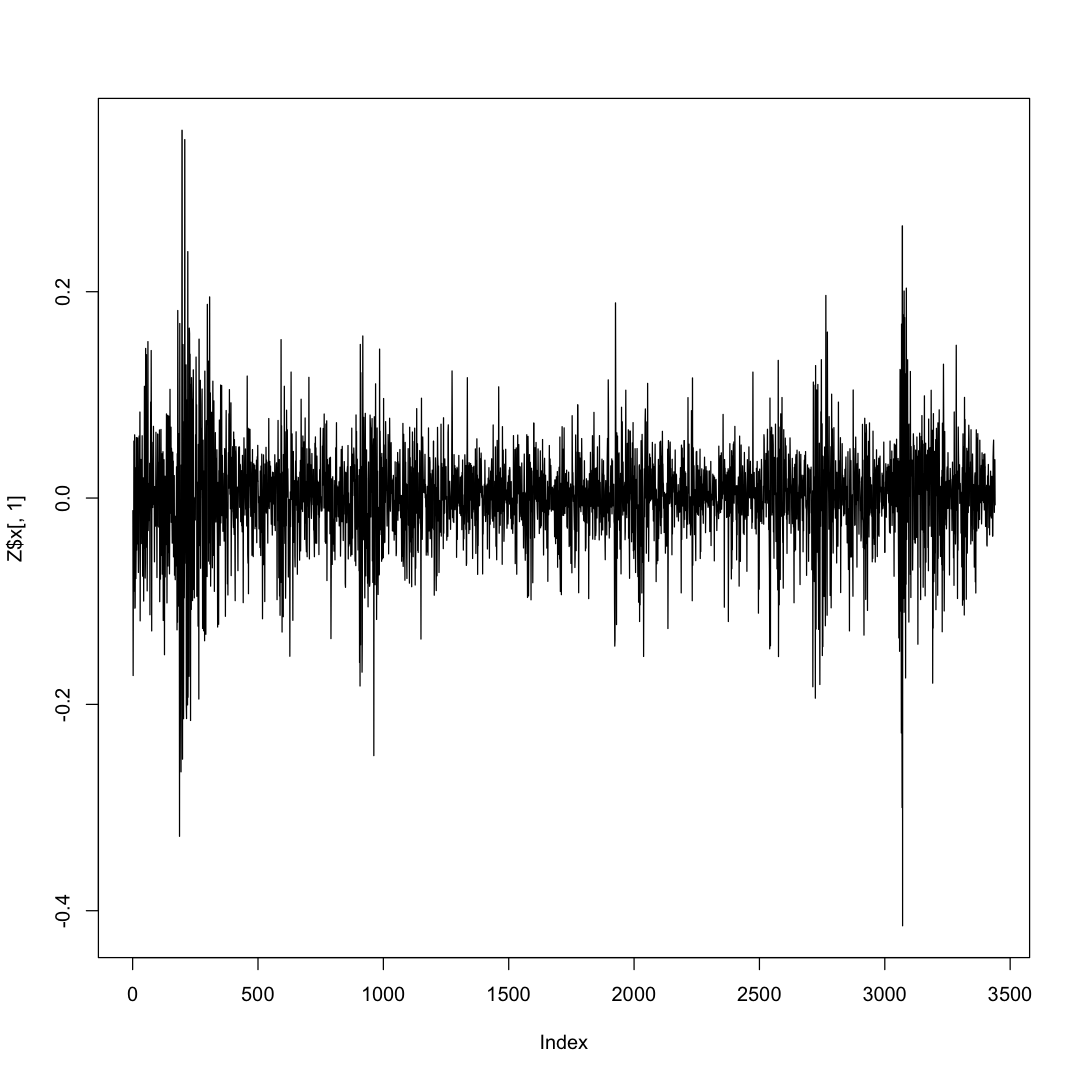

In [8]:
options(repr.plot.width=9, repr.plot.height=9)
plot(Z$x[,1], type="l")

In [9]:
tail(Z$x[,])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
"[3435,]",0.004585131,-0.0021875210,0.0145087924,-0.0065931370,-0.0008968337,0.009896510,-0.0075281019,0.009680313,-0.0003370426
"[3436,]",0.005344296,-0.0185972723,-0.0136630257,-0.0077784943,0.0035719162,0.007790989,-0.0137414949,0.003336479,0.0013189939
"[3437,]",-0.013880727,0.0115804815,0.0005253407,0.0070654776,-0.0053790727,0.005434445,-0.0007646884,0.004312391,0.0009269102
"[3438,]",0.033443431,0.0008739165,-0.0042568300,0.0178485267,0.0104554854,0.001718901,-0.0039505404,0.004906469,0.0007091098
"[3439,]",0.037190500,-0.0035461491,0.0139748729,-0.0207176989,-0.0105275526,0.005883213,0.0172353153,0.001139066,-0.0015833466
"[3440,]",-0.006602264,0.0101514204,0.0126625726,0.0002773788,-0.0091918341,0.008038603,-0.0083479943,0.004098259,0.0005857816


In [10]:
Z$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
V1,0.2859284,-0.131070113,0.15587947,-0.04397708,0.12687005,0.04086547,0.9201211074,0.10219721,2.071256e-04
V2,0.2732715,-0.124655033,0.12472422,-0.06514427,-0.09584144,-0.24258629,-0.0022346733,-0.90660919,2.232458e-03
V3,0.3273369,-0.125402662,0.09029541,-0.01690909,-0.23510455,-0.81416728,-0.1084858406,0.37251057,-3.123647e-03
V4,0.2869842,-0.132758016,0.32414932,0.14465345,0.45416584,0.09650063,-0.2306502141,0.06743474,7.075959e-01
V5,0.4665917,-0.278264973,-0.77813840,0.27502065,0.03557187,0.14011978,-0.0520069765,0.01096161,-1.141576e-03
V6,0.4134335,0.893216303,-0.10286691,-0.09344445,0.10710859,-0.01727649,-0.0009085262,-0.01232938,6.190884e-04
V7,0.3391248,0.006032146,0.35137381,0.28055993,-0.69915057,0.42293373,-0.0830777964,0.09051959,6.312750e-04
V8,0.2867768,-0.131567967,0.32612787,0.14450896,0.45499353,0.09959726,-0.2302092747,0.06309166,-7.066053e-01
V9,0.2611067,-0.203268184,-0.03186691,-0.88805786,-0.06789253,0.24202602,-0.1606227683,0.10889175,-5.746163e-05


In [11]:
Z_periods_classical = c();
i = 1;
for (year in first_year:last_year) {
    subdf = df[i:(i+364),];
    i = i + 365;
    Z_period = prcomp(subdf[,1:9], retx = TRUE);
    Z_periods_classical = rbind(Z_periods_classical, as.matrix(Z_period$x));
}

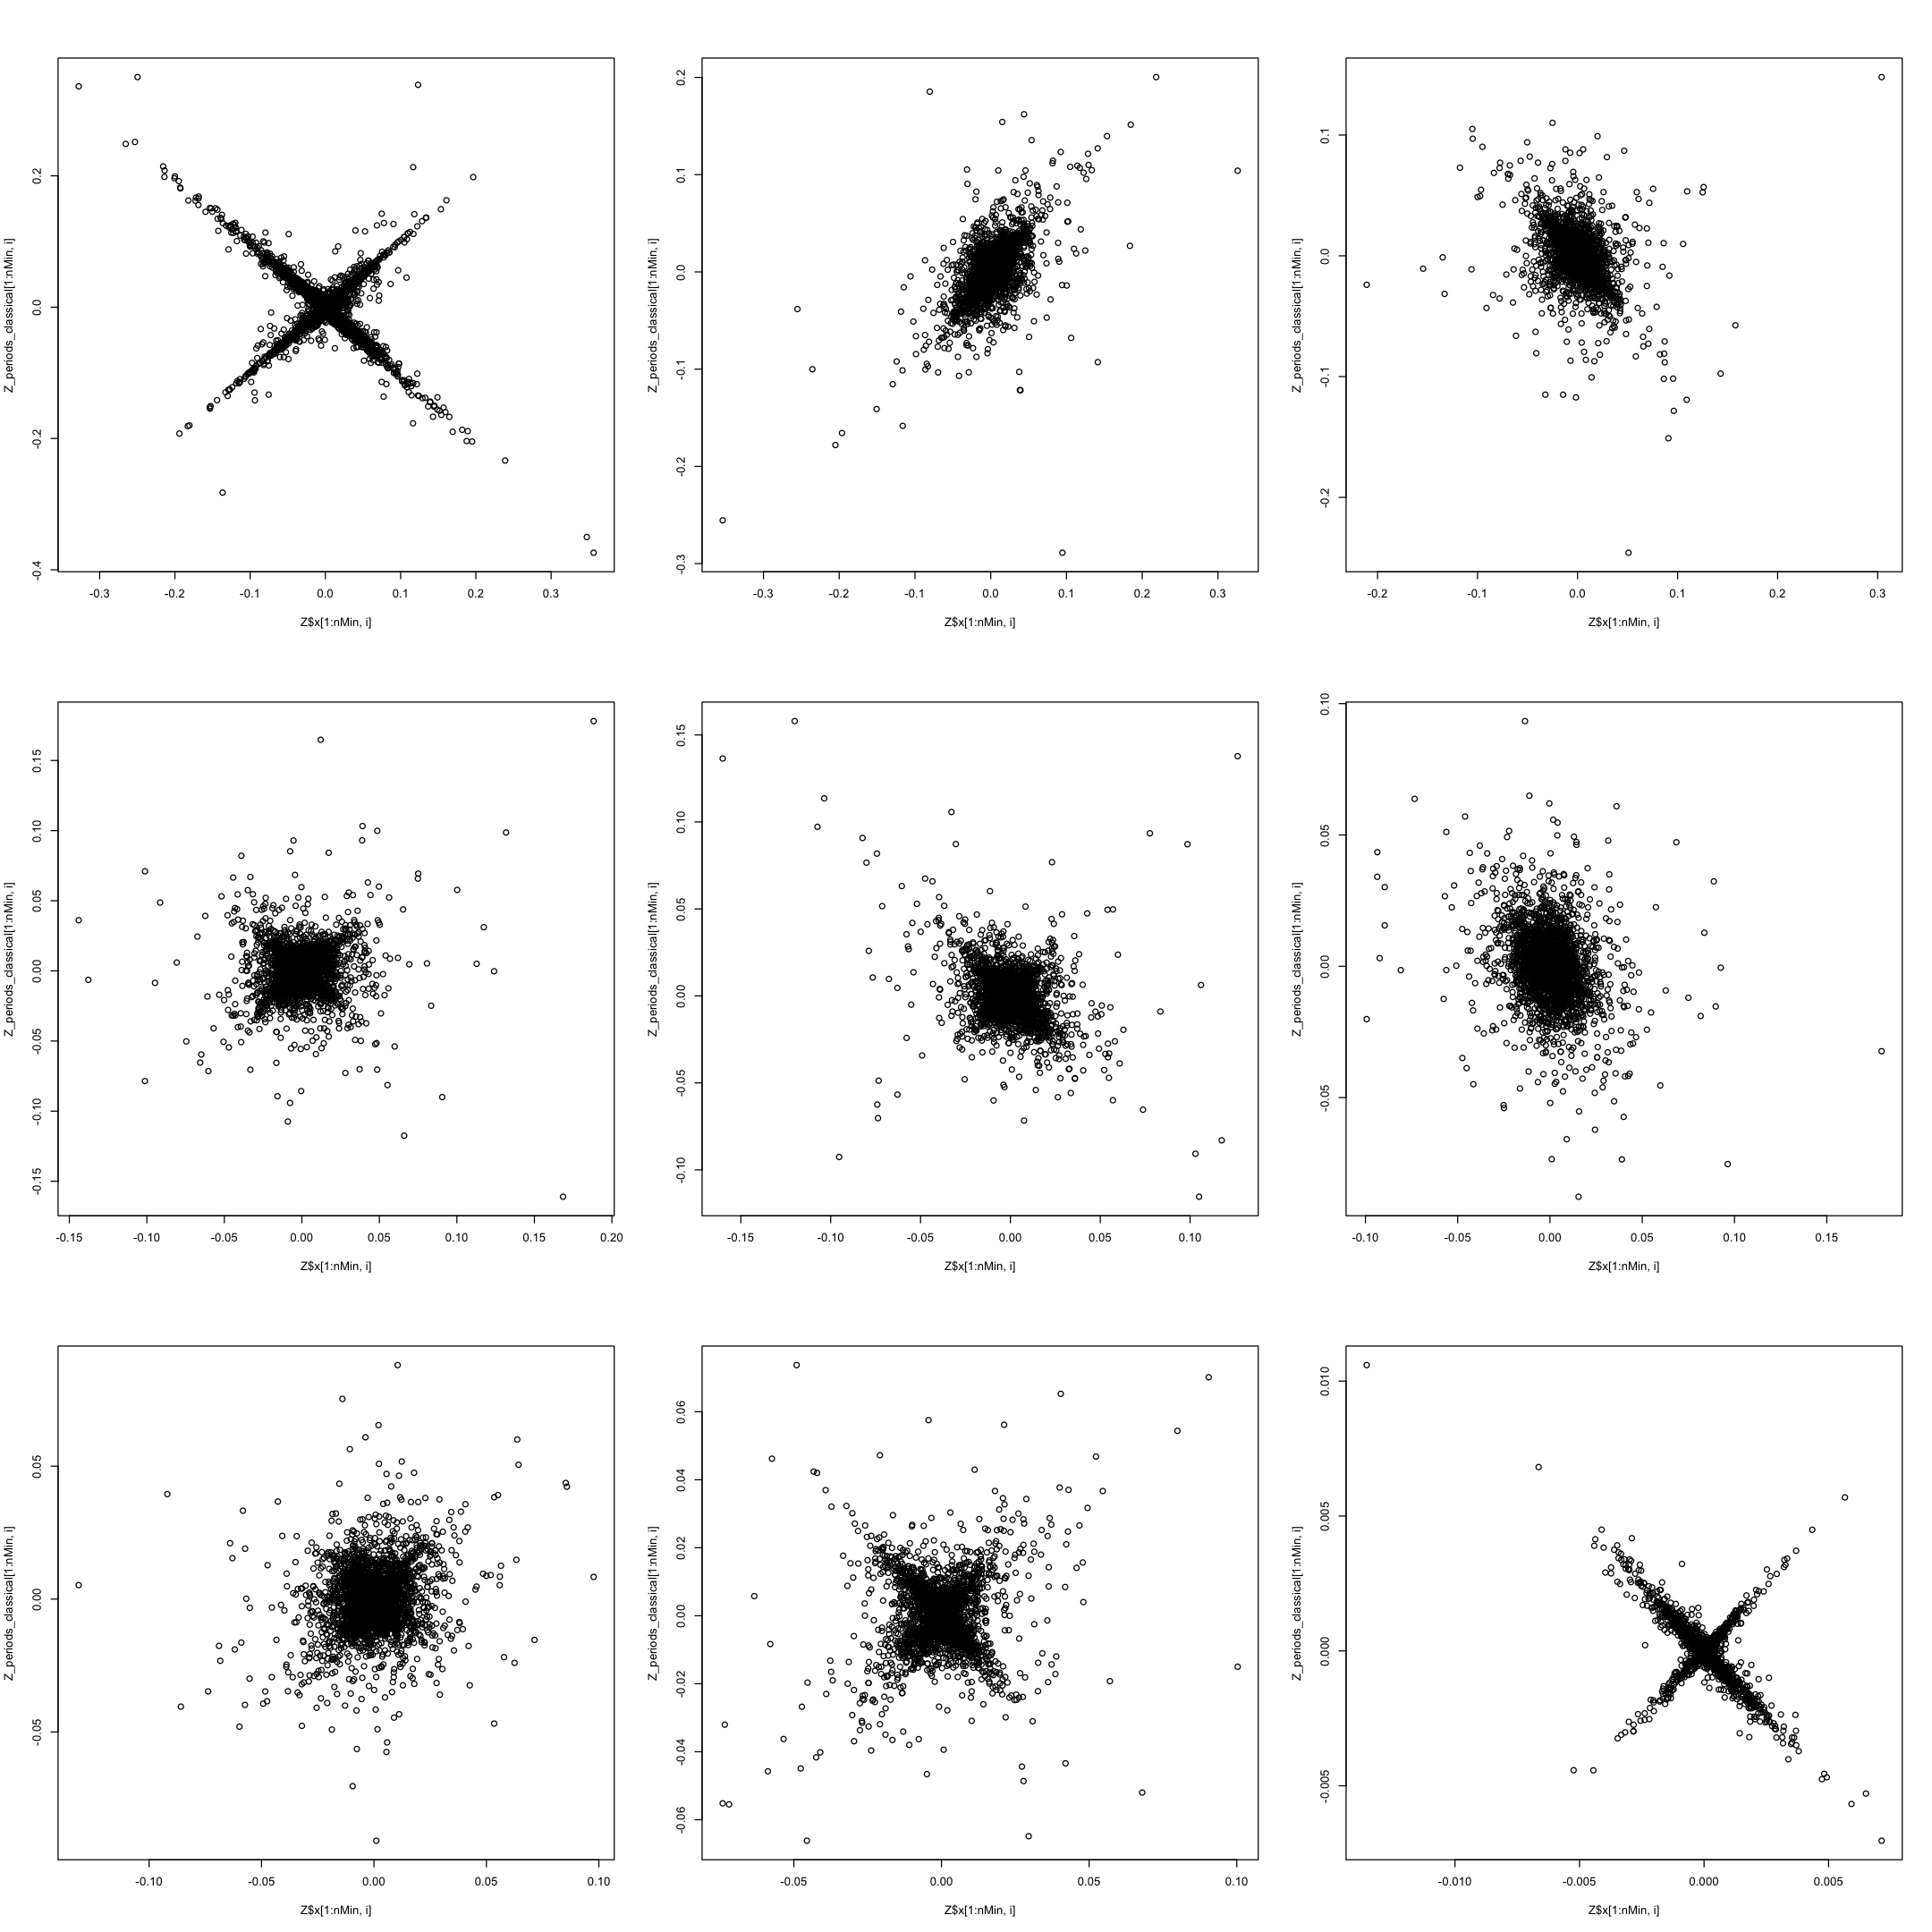

In [12]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(3,3))
nMin = min(dim(Z$x)[1], dim(Z_periods_classical)[1])
for (i in 1:9) {
    plot(Z$x[1:nMin, i], Z_periods_classical[1:nMin, i])
}

In [13]:
dim(Z_periods_classical)

[1] 2920    9

## IPCA

In [14]:
source("xpca.R")

In [15]:
Z_periods_ipca = c();
W = NA;
i = 1;
for (year in first_year:last_year) {
    subdf = df[i:(i+364),];
    i = i + 365;
    result = ipca(as.matrix(subdf[,1:9]), W);
    Z_period = result$P;
    Z_periods_ipca = rbind(Z_periods_ipca, Z_period);
    W = result$W;
}

In [16]:
tail(Z_periods_classical)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
2915,-0.024606656,0.010776184,-0.003968895,0.0006828031,-0.002311872,0.020165414,-0.0027151187,0.013900378,0.0005144732
2916,-0.048518929,0.009789698,0.023999583,-0.0236418041,-0.003227162,-0.001683884,0.0005753391,0.006489164,-0.0003753553
2917,-0.129777789,0.013250096,0.022963184,-0.0162846072,0.003081880,0.007219963,-0.0151515896,0.001012865,-0.0001317248
2918,0.038791381,0.005972379,-0.012888107,-0.0048210592,-0.007553930,-0.002122915,0.0051056527,0.002816707,-0.0007521983
2919,0.005144847,-0.012903320,-0.016168291,-0.0132823407,-0.011247322,-0.003303575,0.0021311635,-0.001601726,0.0004900603
2920,0.079200477,0.009677546,-0.002541718,0.0042229641,0.003688860,0.002322985,0.0076069044,0.003038819,-0.0002615564


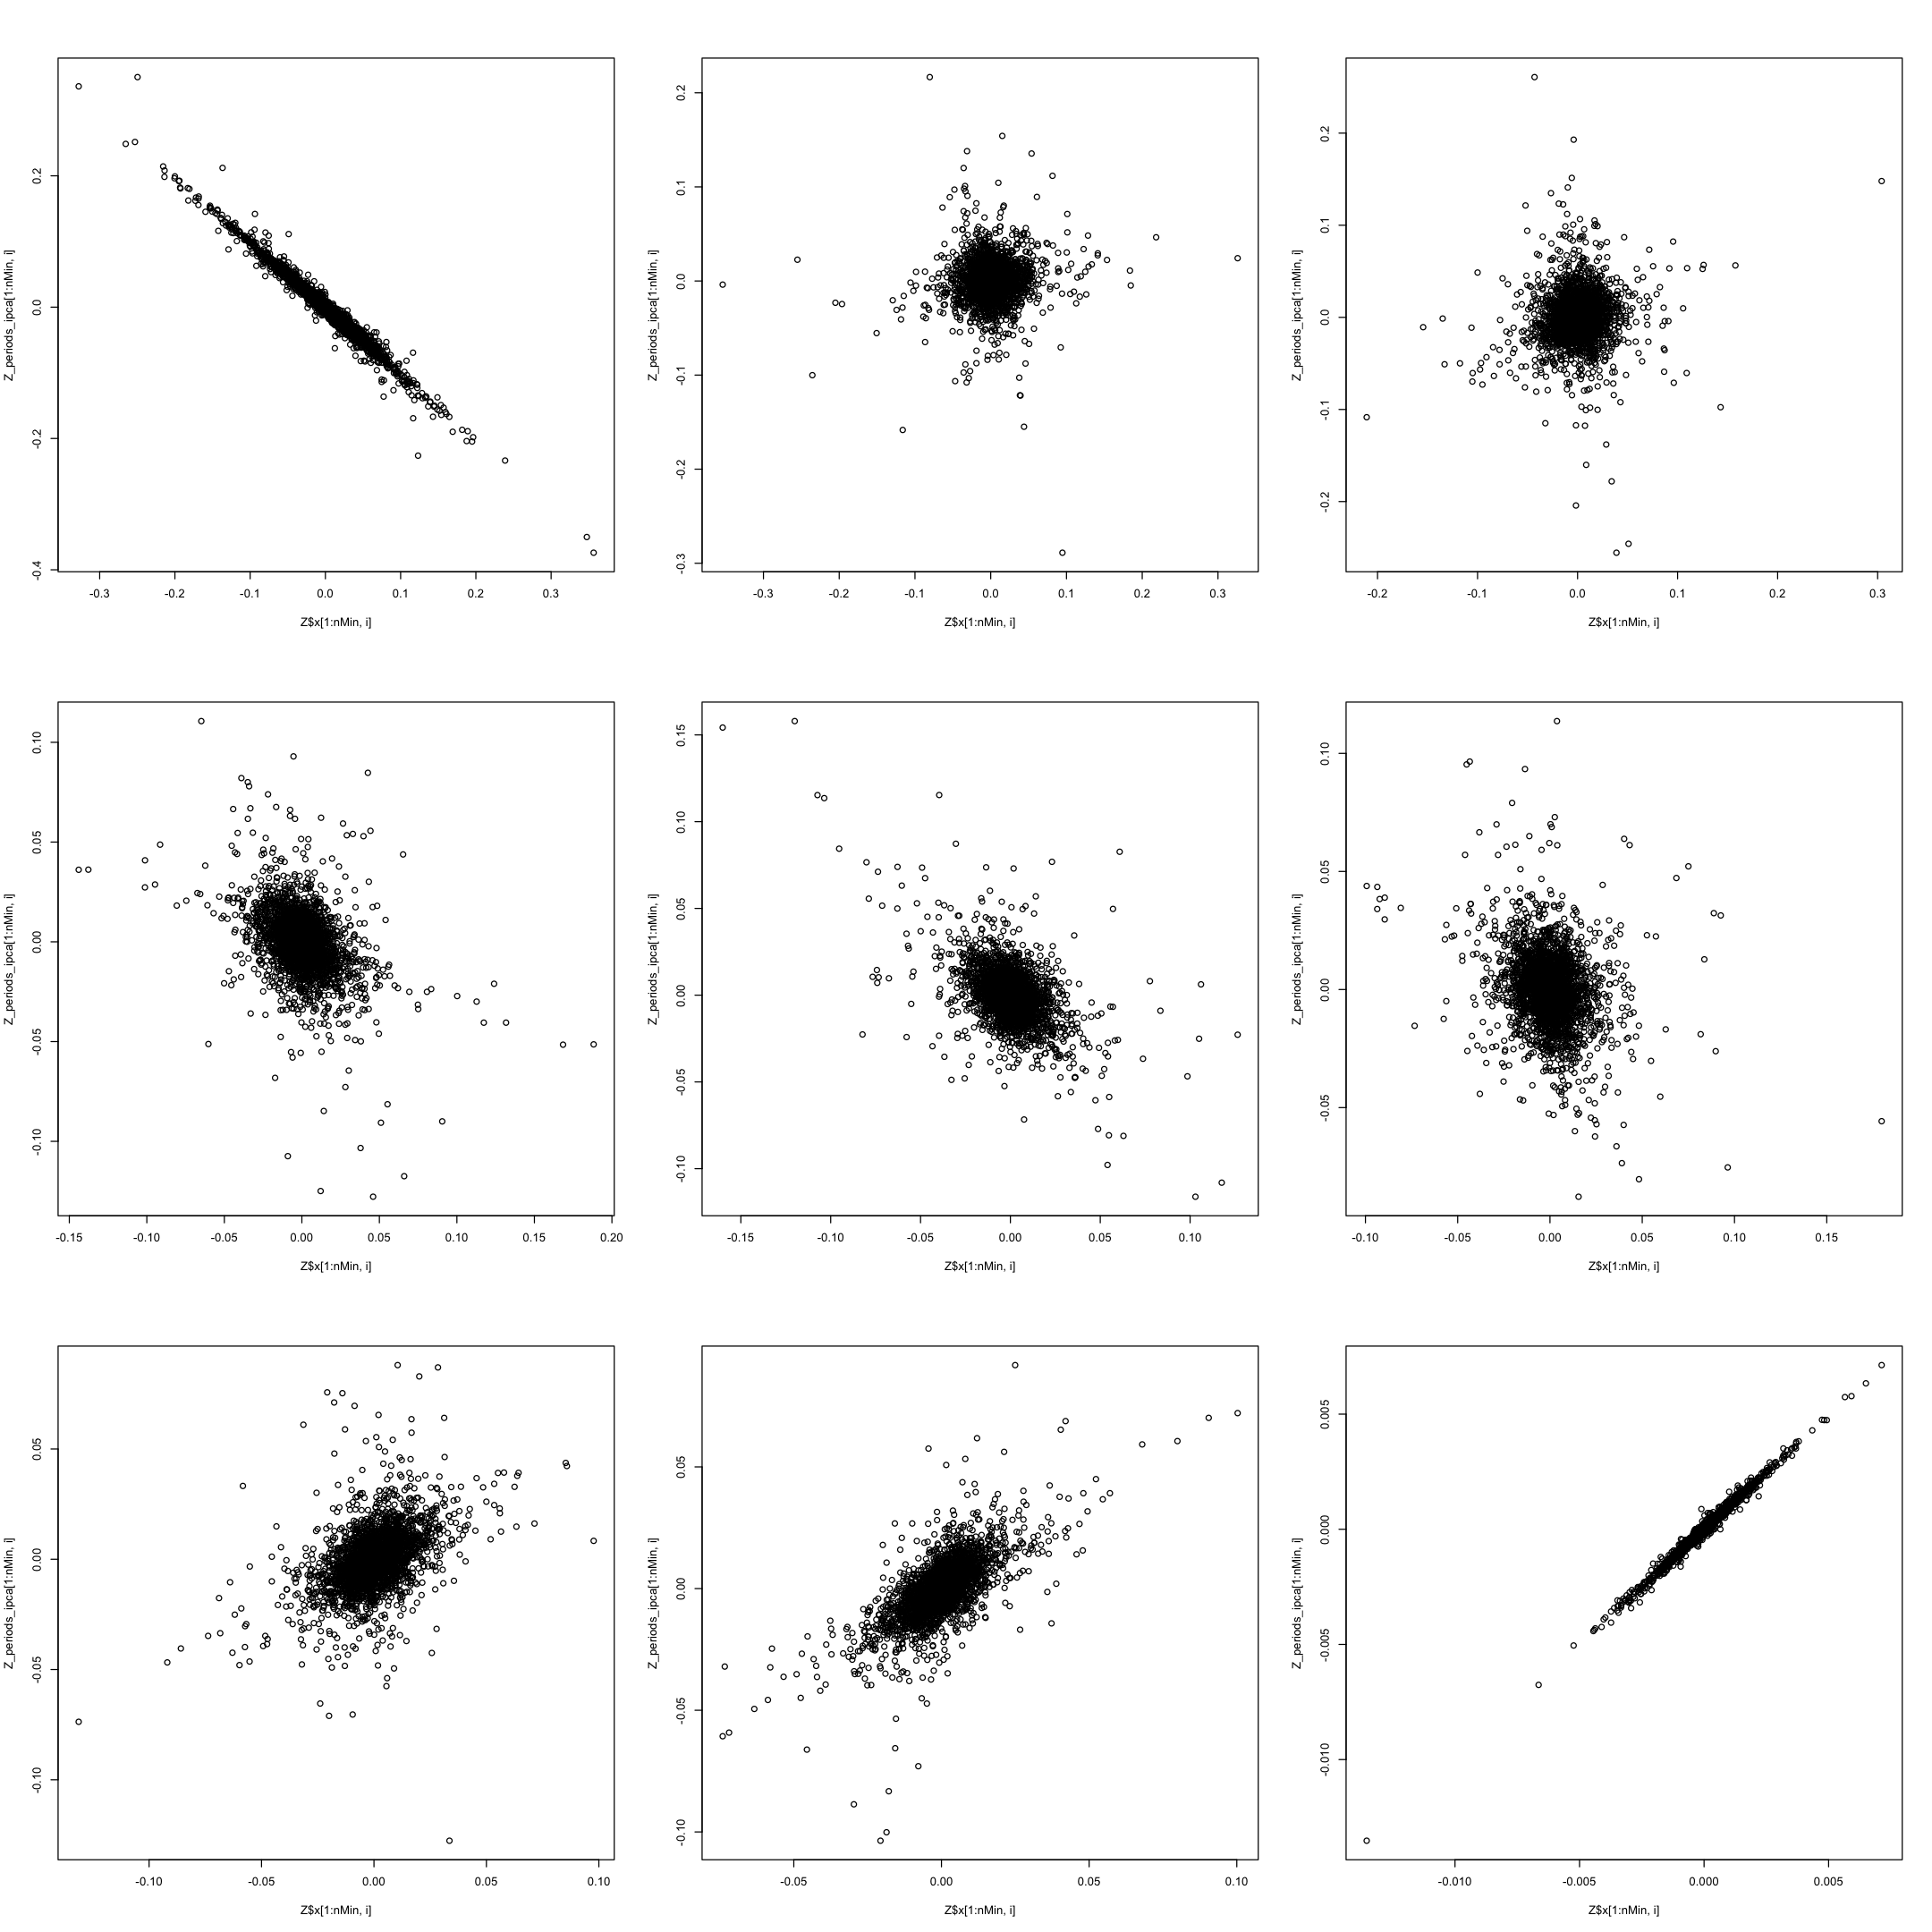

In [17]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(3,3))
nMin = min(dim(Z$x)[1], dim(Z_periods_ipca)[1])
for (i in 1:9) {
    plot(Z$x[1:nMin, i], Z_periods_ipca[1:nMin, i])
}

In [18]:
tail(Z$x[, 1])

[1]  0.004585131  0.005344296 -0.013880727  0.033443431  0.037190500
[6] -0.006602264

In [19]:
tail(Z_periods_ipca[, 1])

2915         2916         2917         2918         2919         2920 
 0.024606656  0.048518929  0.129777789 -0.038791381 -0.005144848 -0.079200477